In [1]:
%pip install dabl

   ---------------------------------------- 0.0/558.3 kB ? eta -:--:--
   ------------------ --------------------- 262.1/558.3 kB ? eta -:--:--
   ---------------------------------------- 558.3/558.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dabl
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
data=pd.read_csv('train.csv')
data.head(10)

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,680.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.523846,0.460180,37.966864,6328.89332
1,1,514.0,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.583380,0.485219,40.813181,7502.24389
2,2,431.0,12.5,0.25,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.429001,0.408851,31.881847,4587.38557
3,3,656.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.404225,0.401708,30.798351,4234.86859
4,4,594.0,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.509001,0.452027,35.884011,6026.06365
5,5,688.0,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.629606,0.521136,44.278583,8090.41713
6,6,342.0,12.5,0.25,0.25,0.75,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.508992,0.456067,36.810187,6960.10751
7,7,546.0,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.506794,0.450498,35.520534,6347.56076
8,8,238.0,12.5,0.25,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.398218,0.405525,31.109242,4225.96131
9,9,621.0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.570330,0.436459,36.018624,6801.49205


In [4]:
data.shape

(15000, 19)

In [5]:
data.drop('Row#', axis='columns', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   clonesize             15000 non-null  float64
 2   honeybee              15000 non-null  float64
 3   bumbles               15000 non-null  float64
 4   andrena               15000 non-null  float64
 5   osmia                 15000 non-null  float64
 6   MaxOfUpperTRange      15000 non-null  float64
 7   MinOfUpperTRange      15000 non-null  float64
 8   AverageOfUpperTRange  15000 non-null  float64
 9   MaxOfLowerTRange      15000 non-null  float64
 10  MinOfLowerTRange      15000 non-null  float64
 11  AverageOfLowerTRange  15000 non-null  float64
 12  RainingDays           15000 non-null  float64
 13  AverageRainingDays    15000 non-null  float64
 14  fruitset              15000 non-null  float64
 15  fruitmass          

In [6]:
data.shape  #Row column has been dropped

(15000, 18)

In [7]:
# Checking the missing values
data.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

There are no missing values

In [8]:
#check for duplicated values
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [9]:
data.duplicated().sum()

np.int64(0)

There are no duplicate values

In [10]:
data.describe(include="all")

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,19.788167,0.392244,0.283986,0.488813,0.589411,82.269053,49.730460,68.735207,59.299213,28.693973,48.626847,18.758352,0.326333,0.500095,0.445593,36.062045,6010.883275
std,4330.271354,6.622069,0.448164,0.059063,0.149433,0.146088,9.153763,5.550444,7.647413,6.615709,3.197790,5.397329,11.813316,0.166055,0.076495,0.037777,4.092188,1347.446017
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.163652,0.211830,22.079199,1637.704020
25%,3749.750000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451911,0.418220,33.239806,5136.932470
50%,7499.500000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.502842,0.445494,35.923314,6097.442850
75%,11249.250000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.471713,38.934512,7016.893850
max,14999.000000,40.000000,18.430000,0.588000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,34.000000,0.560000,0.937253,0.937853,46.585105,8969.401840


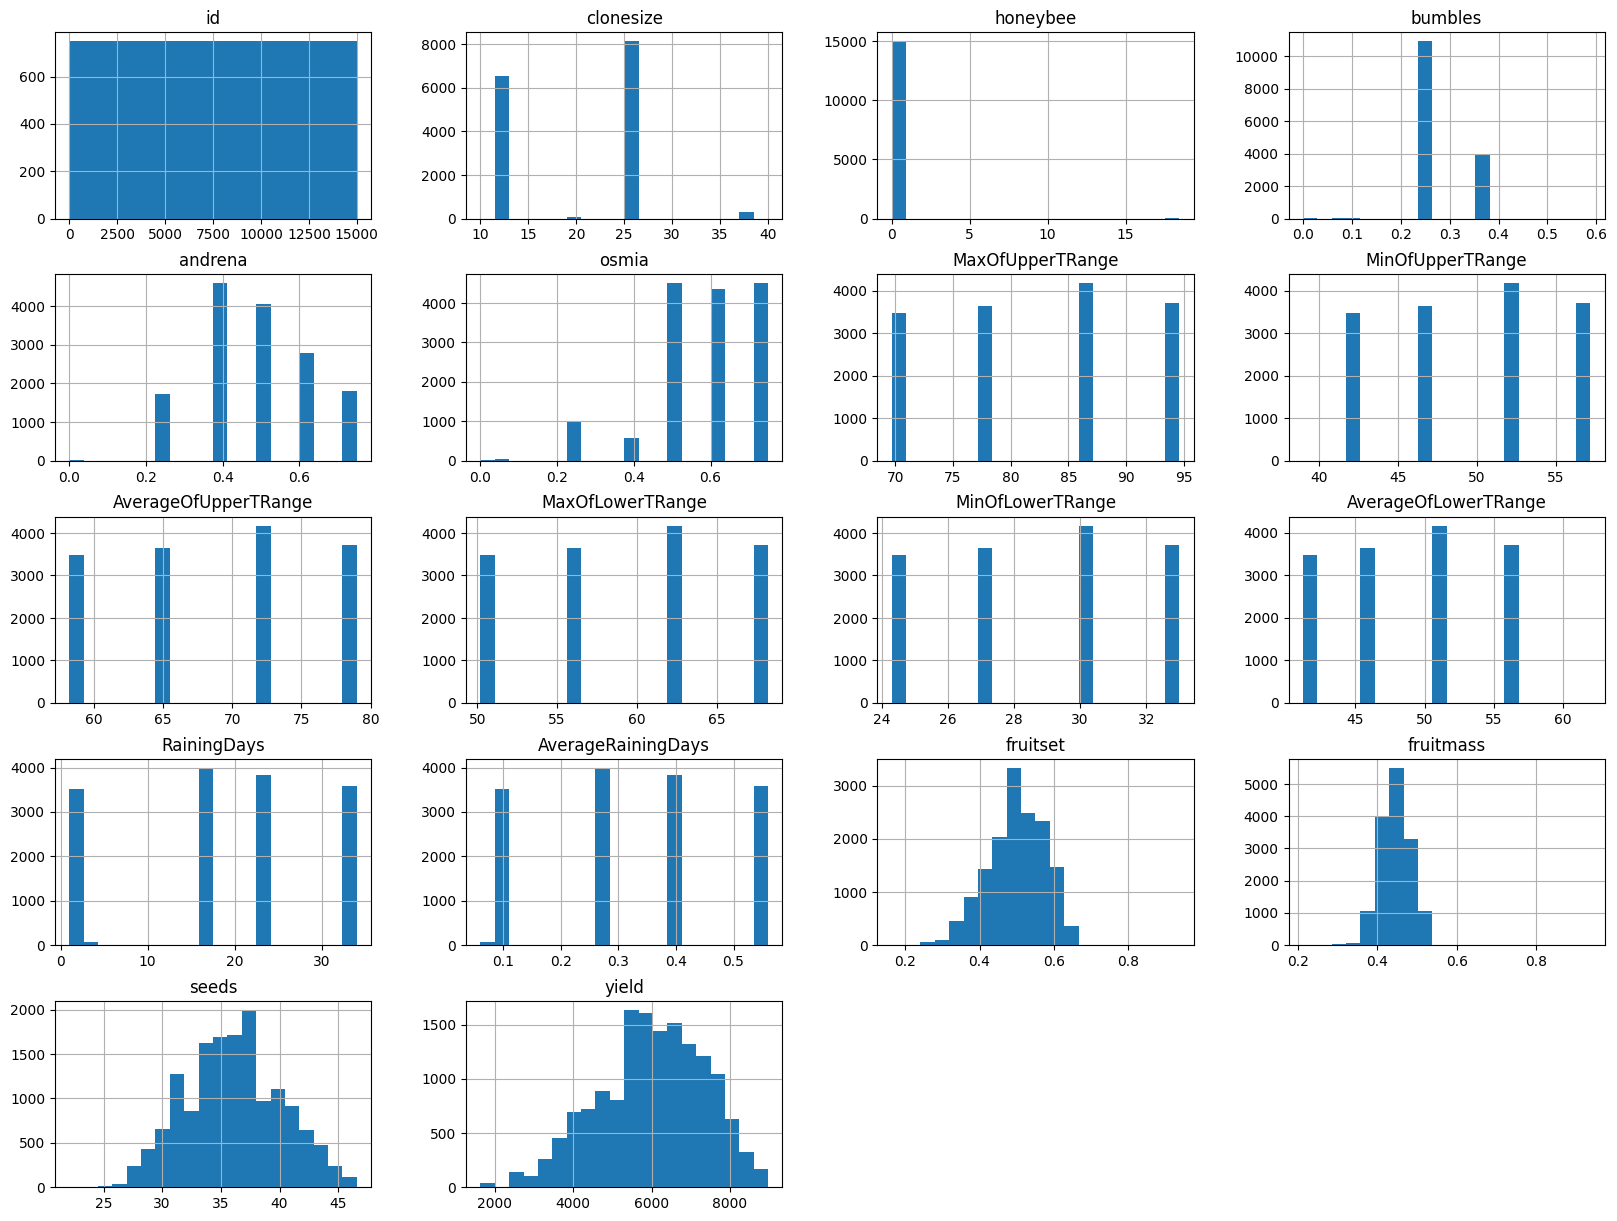

In [11]:
data.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.51E-01'}, xlabel='fruitset', ylabel='yield'>,
         <Axes: title={'center': 'F=8.91E-01'}, xlabel='fruitmass'>,
         <Axes: title={'center': 'F=-5.24E-01'}, xlabel='RainingDays (jittered)'>],
        [<Axes: title={'center': 'F=-3.84E-01'}, xlabel='clonesize (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=-2.68E-01'}, xlabel='honeybee (jittered)'>,
         <Axes: title={'center': 'F=2.10E-01'}, xlabel='osmia (jittered)'>],
        [<Axes: title={'center': 'F=1.69E-01'}, xlabel='bumbles (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=1.14E-01'}, xlabel='andrena (jittered)'>,
         <Axes: title={'center': 'F=-5.13E-03'}, xlabel='MaxOfUpperTRange (jittered)'>]],
       dtype=object),
 None]

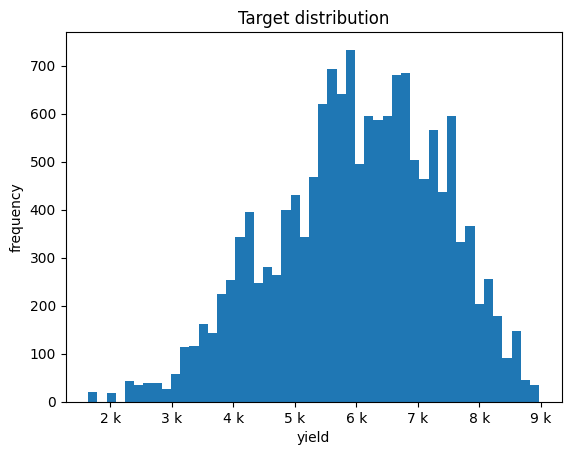

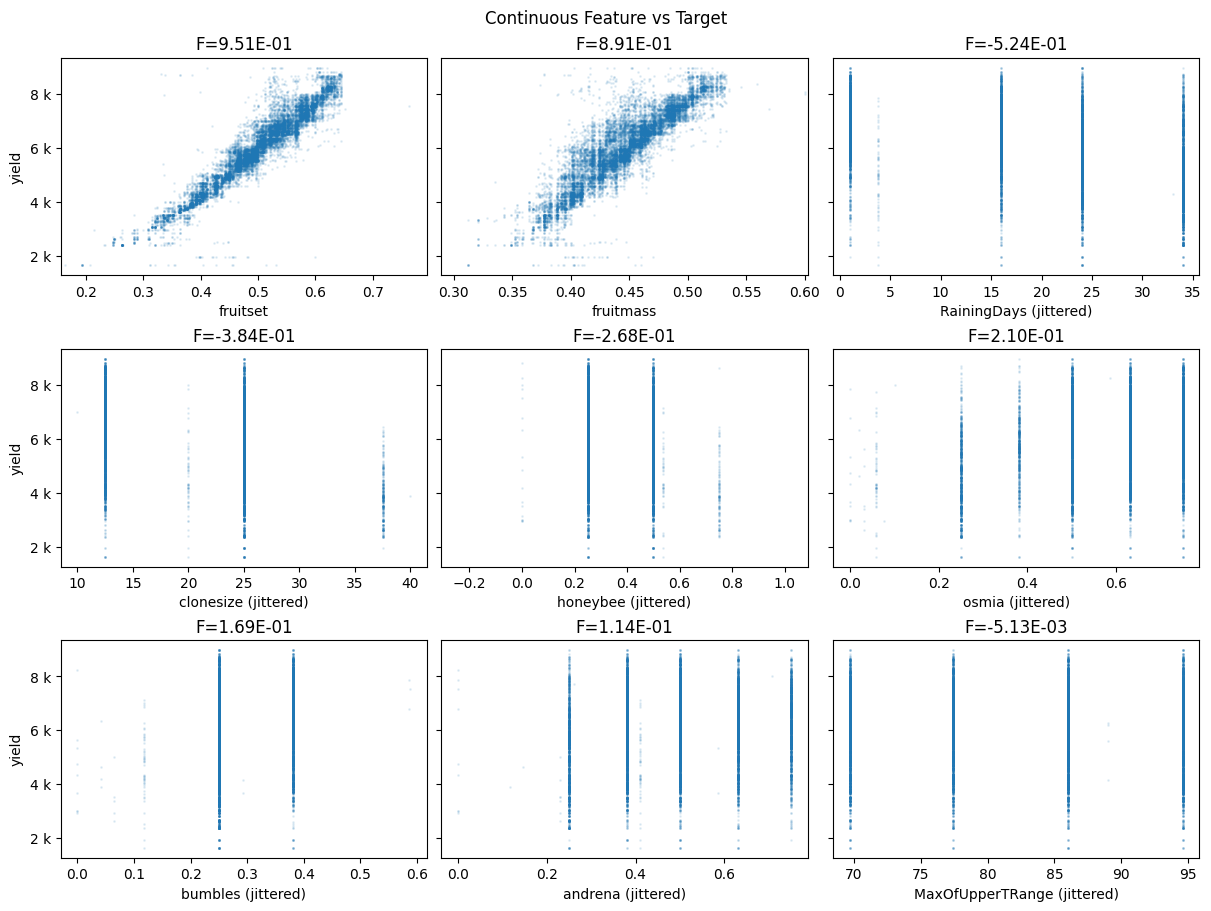

In [12]:
#EDA using dabl
dabl.plot(data, target_col="yield")

<Axes: ylabel='bumbles'>

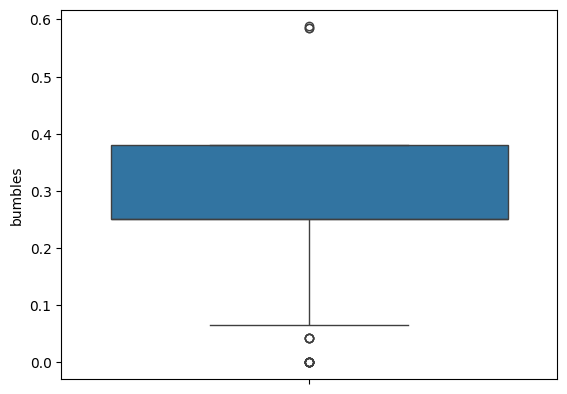

In [13]:
sns.boxplot(data["bumbles"])


<Axes: ylabel='honeybee'>

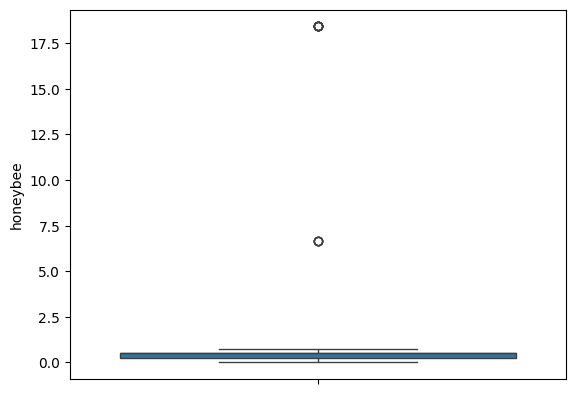

In [14]:
sns.boxplot(data["honeybee"])

<Figure size 2000x2000 with 0 Axes>

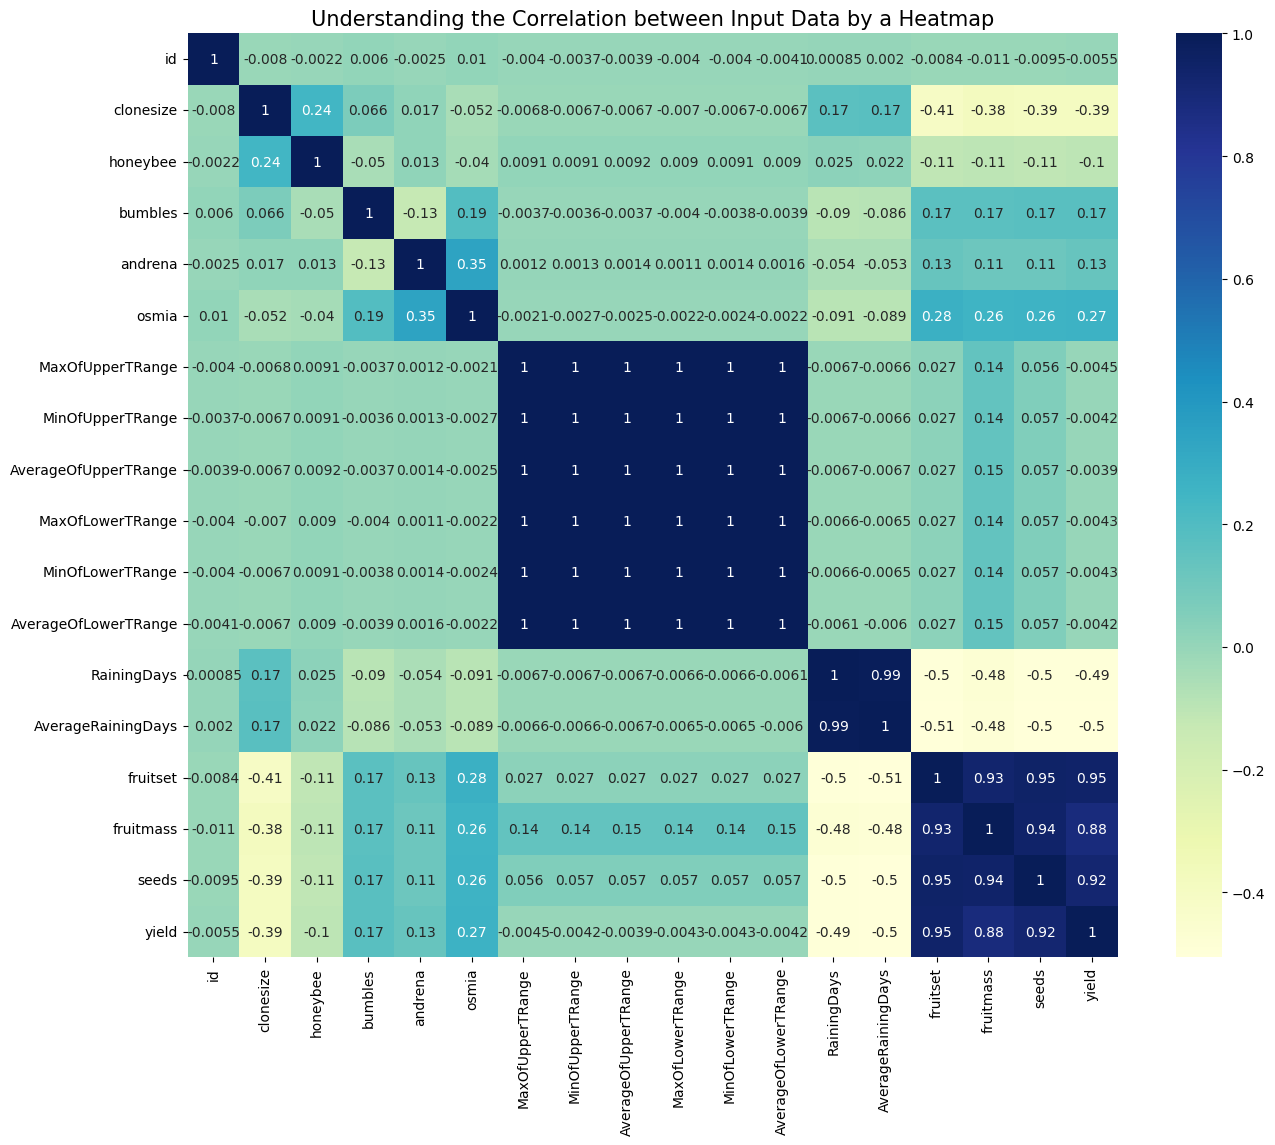

In [15]:
plt.figure(figsize=(20,20))
c = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap', fontsize=15)
plt.show()

In [16]:
#splitting into independent and dependent features
X = data.drop(columns=['yield'])
y = data[['yield']]

In [17]:
X.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.523846,0.460180,37.966864
1,1,25.0,0.50,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.583380,0.485219,40.813181
2,2,12.5,0.25,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.429001,0.408851,31.881847
3,3,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.404225,0.401708,30.798351
4,4,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.509001,0.452027,35.884011


In [18]:
y.head()

,yield
0,6328.89332
1,7502.24389
2,4587.38557
3,4234.86859
4,6026.06365


In [19]:
#calculating Inter-quartile Range (IQR)
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 -q1
print(iqr)

id                      7499.500000
clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
MaxOfUpperTRange           8.600000
MinOfUpperTRange           5.200000
AverageOfUpperTRange       7.200000
MaxOfLowerTRange           6.200000
MinOfLowerTRange           3.000000
AverageOfLowerTRange       5.000000
RainingDays                8.000000
AverageRainingDays         0.130000
fruitset                   0.107414
fruitmass                  0.053494
seeds                      5.694706
dtype: float64


In [21]:
# iqr_data = data[~((data < (q1 - 1.5 * iqr)) | (data> (q3 + 1.5 * iqr))).any(axis=1)]
# iqr_data.shape
# Calculate the interquartile range (IQR)
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 - q1
print(iqr)

# Align data with the quantiles
data_aligned, q1_aligned = data.align(q1, axis=1)
_, q3_aligned = data.align(q3, axis=1)

# Remove outliers based on IQR
iqr_data = data_aligned[~((data_aligned < (q1_aligned - 1.5 * iqr)) | (data_aligned > (q3_aligned + 1.5 * iqr))).any(axis=1)]

# Print the shape of the filtered data
print(iqr_data.shape)


id                      7499.500000
clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
MaxOfUpperTRange           8.600000
MinOfUpperTRange           5.200000
AverageOfUpperTRange       7.200000
MaxOfLowerTRange           6.200000
MinOfLowerTRange           3.000000
AverageOfLowerTRange       5.000000
RainingDays                8.000000
AverageRainingDays         0.130000
fruitset                   0.107414
fruitmass                  0.053494
seeds                      5.694706
dtype: float64
(11264, 18)


In [22]:
iqr_data = iqr_data.reset_index().drop(["index"], axis=1)
iqr_data

,AverageOfLowerTRange,AverageOfUpperTRange,AverageRainingDays,MaxOfLowerTRange,MaxOfUpperTRange,MinOfLowerTRange,MinOfUpperTRange,RainingDays,andrena,bumbles,clonesize,fruitmass,fruitset,honeybee,id,osmia,seeds,yield
0,45.8,64.7,0.56,55.8,77.4,27.0,46.8,34.0,0.50,0.38,12.5,0.408851,0.429001,0.25,2,0.63,31.881847,4587.38557
1,55.9,79.0,0.26,68.2,94.6,33.0,57.2,16.0,0.38,0.38,25.0,0.401708,0.404225,0.50,3,0.50,30.798351,4234.86859
2,55.9,79.0,0.56,68.2,94.6,33.0,57.2,34.0,0.50,0.25,25.0,0.452027,0.509001,0.50,4,0.75,35.884011,6026.06365
3,45.8,64.7,0.56,55.8,77.4,27.0,46.8,34.0,0.75,0.25,12.5,0.456067,0.508992,0.25,6,0.63,36.810187,6960.10751
4,45.8,64.7,0.39,55.8,77.4,27.0,46.8,24.0,0.50,0.25,25.0,0.450498,0.506794,0.50,7,0.63,35.520534,6347.56076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11259,45.8,64.7,0.26,55.8,77.4,27.0,46.8,16.0,0.38,0.25,12.5,0.442249,0.488309,0.25,14994,0.50,35.724834,5178.27031
11260,50.8,71.9,0.39,62.0,86.0,30.0,52.0,24.0,0.38,0.25,12.5,0.428904,0.462102,0.25,14995,0.50,33.331194,5322.84043
11261,41.2,58.2,0.26,50.2,69.7,24.3,42.1,16.0,0.38,0.38,12.5,0.459384,0.542170,0.25,14996,0.63,43.755034,8357.06722
11262,55.9,79.0,0.26,68.2,94.6,33.0,57.2,16.0,0.38,0.25,12.5,0.467854,0.545095,0.25,14997,0.75,38.317710,6578.23522


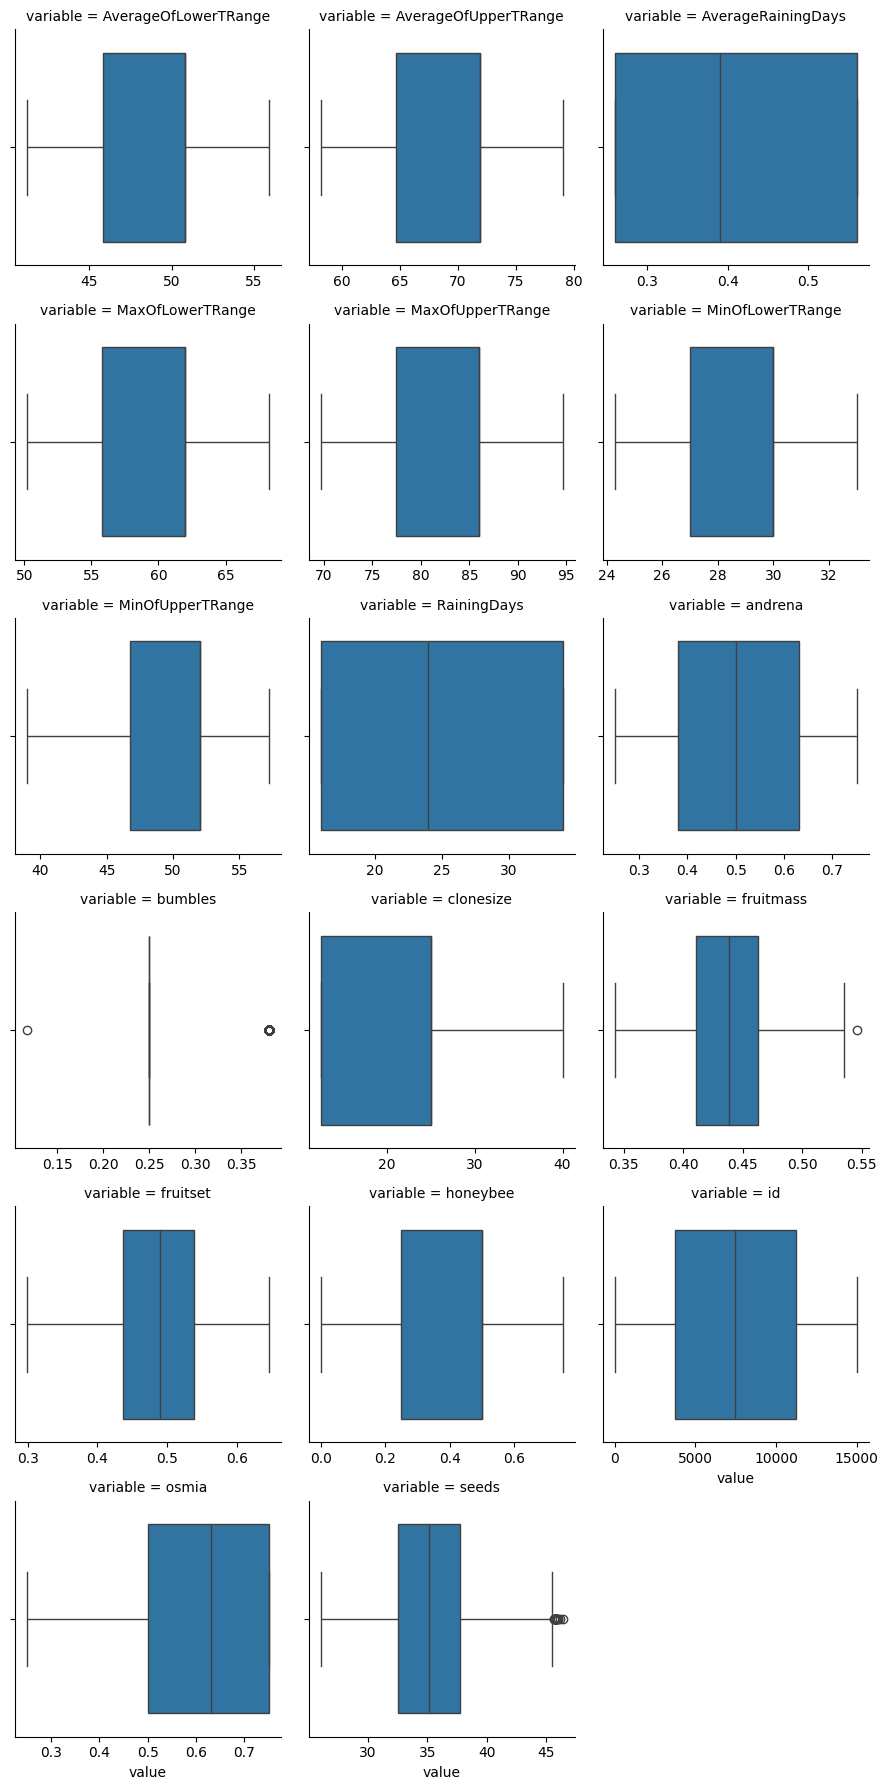

In [23]:
unpivot = pd.melt(iqr_data, iqr_data.describe().columns[-1], iqr_data.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

# Feature Selection


In [24]:
#splitting IQR processed data into independent and dependent features
X = iqr_data.drop(columns=['yield'])
y = iqr_data[['yield']]

In [25]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

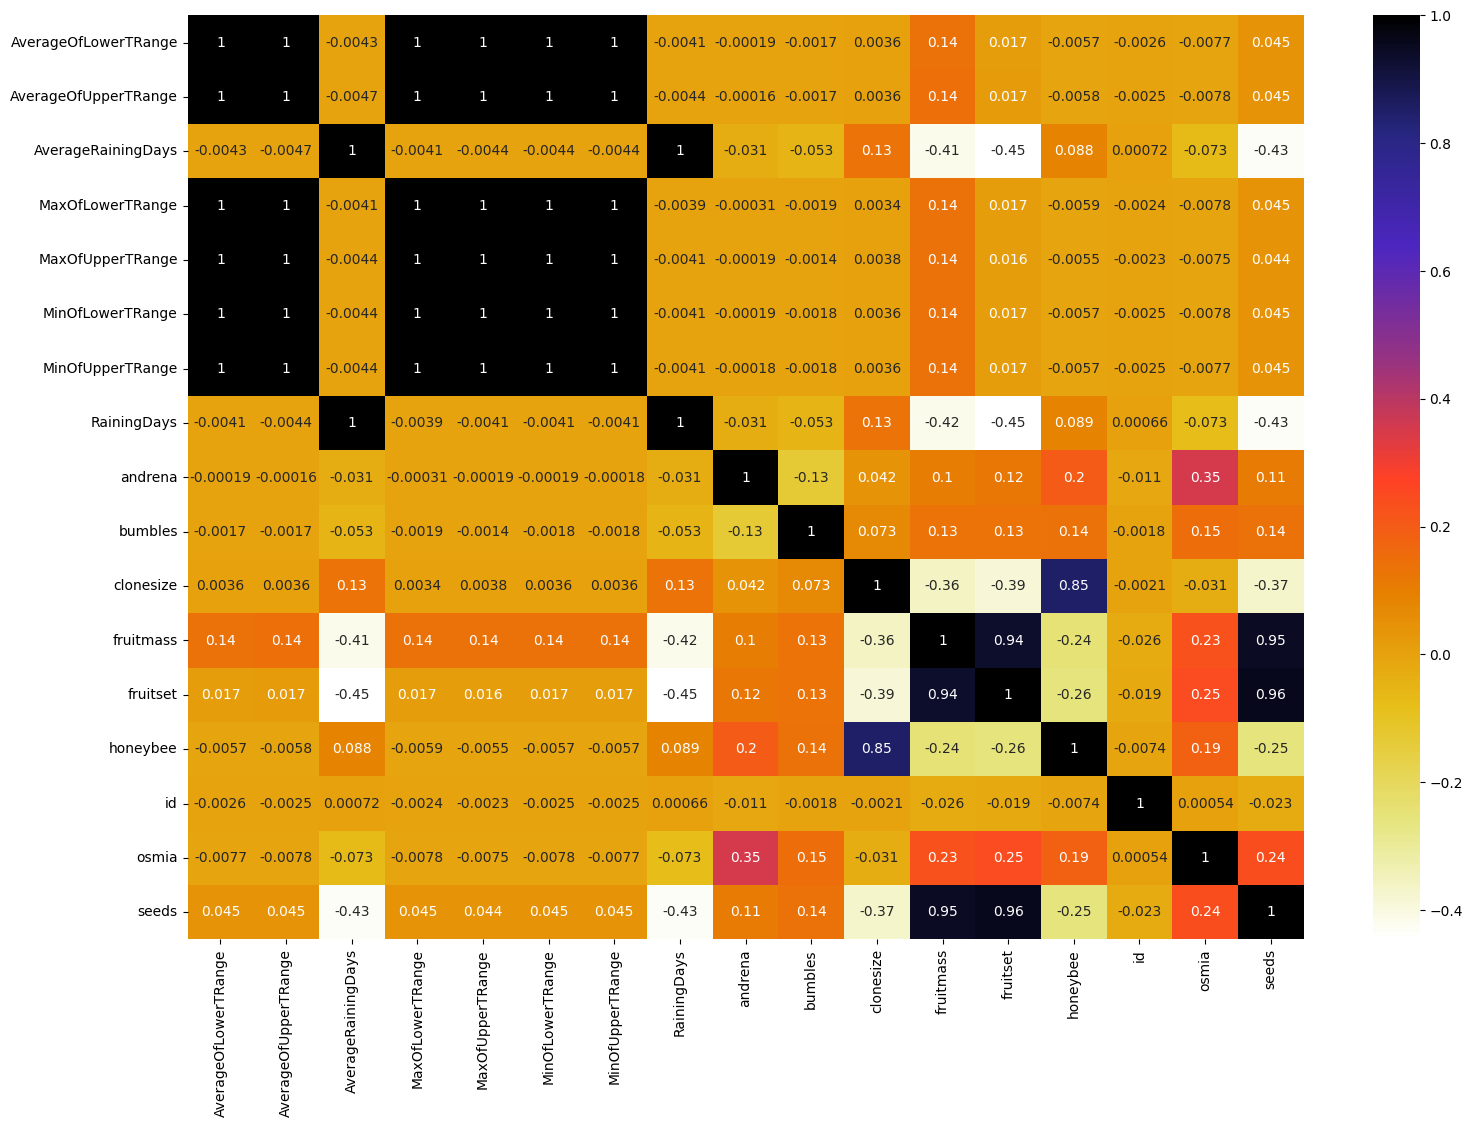

In [26]:
# Using Pearson Correlation
plt.figure(figsize=(18,12))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [27]:
#With this function, we can select highly correlated features
#The first feature that is correlated with any other feature will be removed

def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of Correlated Columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:  
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

9

In [29]:

corr_features = {'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}
corr_features

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}

In [30]:
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

In [31]:
X_train.shape

(9011, 10)

In [32]:
X_test.shape

(2253, 10)

Analysis on the basis of either Mutual Information Gain or Correlation Regression Values

Feature 0: 0.006218
Feature 1: 0.145689
Feature 2: 0.030725
Feature 3: 0.011210
Feature 4: 0.092092
Feature 5: 1.064718
Feature 6: 1.621255
Feature 7: 0.000000
Feature 8: 0.063268
Feature 9: 1.252581


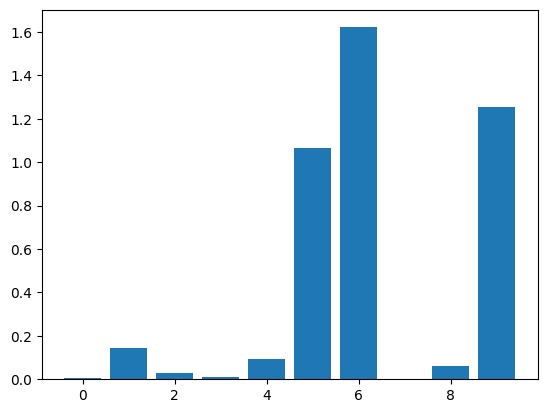

In [33]:
# Mutual Information feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
 
# feature selection
def select_features_info_based(X_train, y_train, X_test):
	mutual_info = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	mutual_info.fit(X_train, y_train)
	# transform train input data
	X_train_fs = mutual_info.transform(X_train)
	# transform test input data
	X_test_fs = mutual_info.transform(X_test)
	return X_train_fs, X_test_fs, mutual_info
 

# Feature Selection
X_train_fs, X_test_fs, fs_info = select_features_info_based(X_train, y_train, X_test)
fs_info
# what are scores for the features
for i in range(len(fs_info.scores_)):
	print('Feature %d: %f' % (i, fs_info.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_info.scores_))], fs_info.scores_)
plt.show()


Feature 0: 1.320744
Feature 1: 2115.277338
Feature 2: 134.003774
Feature 3: 159.334636
Feature 4: 1452.449097
Feature 5: 30640.907418
Feature 6: 75859.783510
Feature 7: 1.971003
Feature 8: 547.856422
Feature 9: 47628.817157


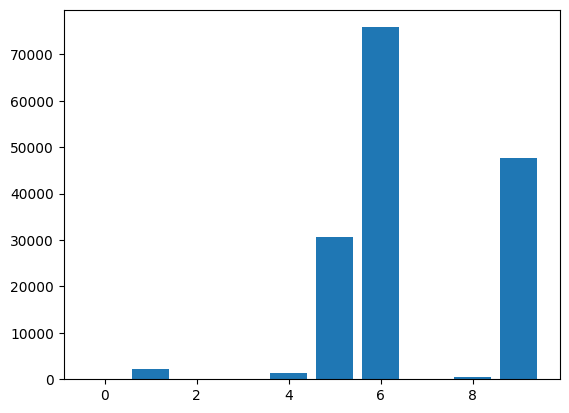

In [34]:
# Correlation feature selection 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
# Feature Selection
def select_features_corr_based(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	# learning relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs_corr = select_features_corr_based(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_corr.scores_)):
	print('Feature %d: %f' % (i, fs_corr.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_corr.scores_))], fs_corr.scores_)
plt.show()

# Why are we choosing feature selection by mutual information gain and not correlation regression method?

Feature Selection via the Correlation Regression Method is showing on 3 dominant features. While modelling, this could hamper the chances of the data being trained by other features, however small their effect on the target variable would be.

On the other hand, Feature Selection via Mutual Information Gain also shows 3 features that would highly affect the target variable but the other features would make a small effect too. So, ignoring the dependency by the other features would affect the accuracy. The graph shows better competency of the variables and hence we will go by this feature selection. 

# Modelling

We will now Train the model on these **9 features** and check the metrics of the same on **4 Models**:
<ul>
<li>Linear Regression</li>

<li>Random Forest</li>

<li>Decision Tree</li>

<li>XGBoost</li>
</ul>

In [35]:
X_train_fs_model, X_test_fs_model, fs_info = select_features_info_based(X_train, y_train, X_test)


In [36]:
X_train_fs_model.shape

(9011, 10)

In [37]:
X_test_fs_model.shape

(2253, 10)

## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_fs_model, y_train)
pred_linear = reg.predict(X_test_fs_model)

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)


MAE: 268.096
MSE: 177725.920
RMSE: 421.576
R-Square: 0.899


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(random_state=1)

# fitting the model
rf_model.fit(X_train_fs_model, y_train)
pred_rf=rf_model.predict(X_test_fs_model)
pred_rf=pred_rf.reshape(151,1)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

ValueError: cannot reshape array of size 2253 into shape (151,1)

## Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train_fs_model, y_train)
pred_dtree = dtree_reg.predict(X_test_fs_model)

mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test, pred_dtree)

print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)


MAE: 372.059
MSE: 341842.516
RMSE: 584.673
R-Square: 0.805


## XGBoost

In [42]:

!pip install xgboost

In [43]:
import xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train_fs_model, y_train)
pred_xgb = xgb_model.predict(X_test_fs_model) 

mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 272.547
MSE: 179099.699
RMSE: 423.202
R-Square: 0.898


## Model Evaluation

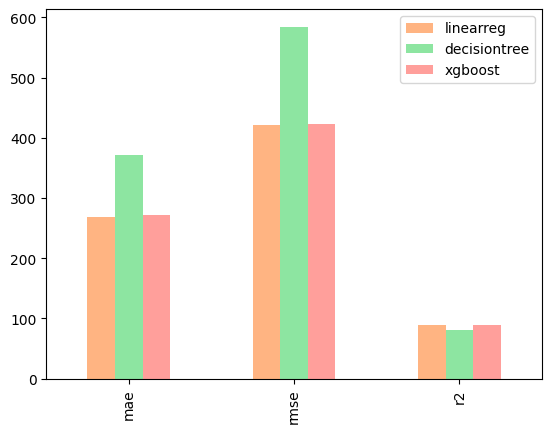

In [45]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    # "randomforest": {
    #     "mae": mae_rf,
    #     "rmse": rmse_rf,
    #     'r2': rsq_rf*100
    # },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3], 
                 sns.color_palette("pastel")[4]]);

## Hyperparameter Tuning


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [47]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        'model__criterion': ['squared_error', 'absolute_error'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
                    'model__criterion': ['squared_error', 'absolute_error'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [48]:
# store the error values in a dataframe and plot as evaluation visualization also see boosted DTree and R2 square values

In [49]:

def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs_model, y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs_model)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    ## Save best grid search pipeline to file
    # dump_file = 'best_grid_search_pipeline.pkl'
    # joblib.dump(best_gs, dump_file, compress=1)
    # print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))
    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

## Prediction and Evaluation


In [ ]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression


Although Linear Regression is the best of the listed models, **RandomForest** would potentially produce closer precise results, due to good learning rate. 

In [129]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=9)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs_model, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs_model)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 18, 'model__min_samples_split': 2}
Best MAE: -114.436
Test set mean absolute error for best params: 111.769 
Test set root mean squared error for best params: 10.572 


In [132]:
#saving the model
import joblib
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'randomforest_blueberry_pollination_tuned_model.joblib'
joblib.dump(RF1, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))



Saved Random Forest tuned model to directory by name: randomforest_blueberry_pollination_tuned_model.joblib


In [130]:
pd.DataFrame(X_test_fs_model).to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

# # Save final training dataset for backup
joblib.dump(X_train_fs_model, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")


Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [131]:
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file
